In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno as msno

In [10]:
# load gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv 
df = pd.read_csv('C:/Users/vidis/OneDrive/Desktop/Summer2022/Project Work/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv')

In [11]:
df_prod = df[(df['type'] == 'production')]
df_cons = df[(df['type'] == 'consumption')]
df_prod.index = pd.to_datetime(df_prod['timeslot'], utc=True)
df_cons.index = pd.to_datetime(df_cons['timeslot'], utc=True)

In [12]:
df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']=='e882f9a7-f1de-4419-9869-7339be303281')]
df_mm_cons = df[(df['type'] == 'consumption') & (df['meter_id']=='e882f9a7-f1de-4419-9869-7339be303281')]
df_mm_prod.index = pd.to_datetime(df_mm_prod['timeslot'], utc=True)
df_mm_cons.index = pd.to_datetime(df_mm_cons['timeslot'], utc=True)

In [13]:
df_prod = df_prod.filter(['num_kwh', 'meter_id'])
df_cons = df_cons.filter(['num_kwh', 'meter_id'])
df_mm_prod = df_mm_prod.filter(['num_kwh'])
df_mm_cons = df_mm_cons.filter(['num_kwh'])

# Most number of values

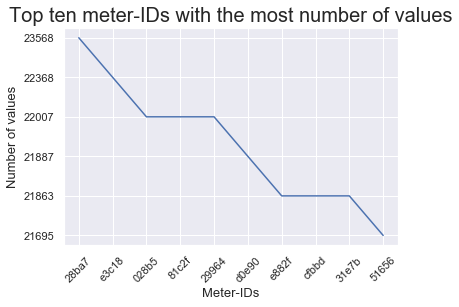

In [8]:
d1 = np.array([df_prod['meter_id'].value_counts(ascending=False).index.tolist(),df_prod['meter_id'].value_counts(ascending=False).tolist()])
sns.set(style="darkgrid")
plt.plot([i[:5] for i in d1[0,0:10]],d1[1,0:10])
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.title('Top ten meter-IDs with the most number of values', size=20)
plt.xlabel('Meter-IDs', size=13)
plt.ylabel('Number of values', size=13)
plt.show()

# Time range considered

In [101]:
maxTime = []
minTime = []
for meter in d1[0,0:10]:
    df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']==meter)]
    maxTime.append(max(df_mm_prod['timeslot']))
    minTime.append(min(df_mm_prod['timeslot']))

d2 = pd.DataFrame({'meter_id': d1[0,0:10], 'min_time':minTime, 'max_time': maxTime})

,meter_id,min_time,max_time
0,28ba7f57-6e83-4341-8078-232c1639e4e3,2016-09-05 00:00:00+02,2019-05-14 23:00:00+02
1,e3c18c2d-30f1-432e-bbfa-ee5d0117987e,2016-10-25 00:00:00+02,2019-05-14 23:00:00+02
2,81c2f221-3be4-4f07-aec2-88f135fd7869,2016-11-09 00:00:00+01,2019-05-14 23:00:00+02
3,028b54e1-6594-4fca-ba0d-bfbb5f9a8b6f,2016-11-09 00:00:00+01,2019-05-14 23:00:00+02
4,29964561-4c45-4dbb-bc91-4a4e35fa9d67,2016-11-09 00:00:00+01,2019-05-14 23:00:00+02
5,d0e900eb-23ec-4449-8d92-4ddb4da657ee,2016-11-14 00:00:00+01,2019-05-14 23:00:00+02
6,cfbbddbf-d18c-46a3-9f43-795c76fbaff3,2016-11-15 00:00:00+01,2019-05-14 23:00:00+02
7,31e7bc53-152c-4bbe-ace3-de6a6206f717,2016-11-15 00:00:00+01,2019-05-14 23:00:00+02
8,e882f9a7-f1de-4419-9869-7339be303281,2016-11-15 00:00:00+01,2019-05-14 23:00:00+02
9,51656824-1e89-41d3-9fc9-7495c2acb8cb,2016-11-22 00:00:00+01,2019-05-14 23:00:00+02


<function matplotlib.pyplot.show(*args, **kw)>

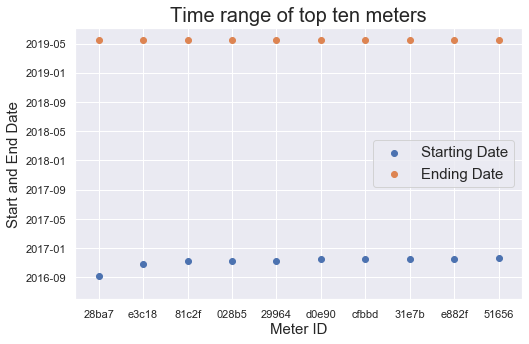

In [127]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter([i[:5] for i in d2['meter_id']], pd.to_datetime(d2['min_time']), label='Starting Date')
plt.scatter([i[:5] for i in d2['meter_id']], pd.to_datetime(d2['max_time']), label='Ending Date')
plt.legend(fontsize=15)
plt.title('Time range of top ten meters', fontsize=20)
plt.xlabel('Meter ID', size=15)
plt.ylabel('Start and End Date', size=15)
plt.show

# Summary Stats

In [7]:
df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']=='28ba7f57-6e83-4341-8078-232c1639e4e3')]
df_mm_cons = df[(df['type'] == 'consumption') & (df['meter_id']=='28ba7f57-6e83-4341-8078-232c1639e4e3')]
df_mm_prod.index = pd.to_datetime(df_mm_prod['timeslot'], utc=True)
df_mm_cons.index = pd.to_datetime(df_mm_cons['timeslot'], utc=True)
df_mm_prod = df_mm_prod.filter(['num_kwh'])
df_mm_cons = df_mm_cons.filter(['num_kwh'])

In [16]:
df_mm_prod['month'] = df_mm_prod.index.month
df_mm_prod['hour'] = df_mm_prod.index.hour
df_mm_cons['month'] = df_mm_cons.index.month
df_mm_cons['hour'] = df_mm_cons.index.hour

Text(0, 0.5, '')

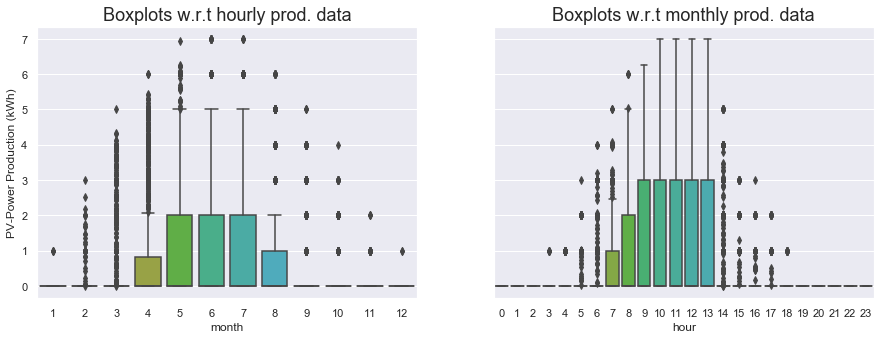

In [17]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15,5)
fig, axes = plt.subplots(1,2, sharey = True)

#create chart in each subplot
sns.boxplot(x='month', y='num_kwh', data=df_mm_prod, ax=axes[0])
sns.boxplot(x='hour', y='num_kwh', data=df_mm_prod, ax=axes[1])
axes[0].set_title('Boxplots w.r.t hourly prod. data', fontsize=18)
axes[1].set_title('Boxplots w.r.t monthly prod. data', fontsize=18)
axes[0].set_ylabel('PV-Power Production (kWh)', size=12) 
axes[1].set_ylabel('', size=12) 

Text(0, 0.5, '')

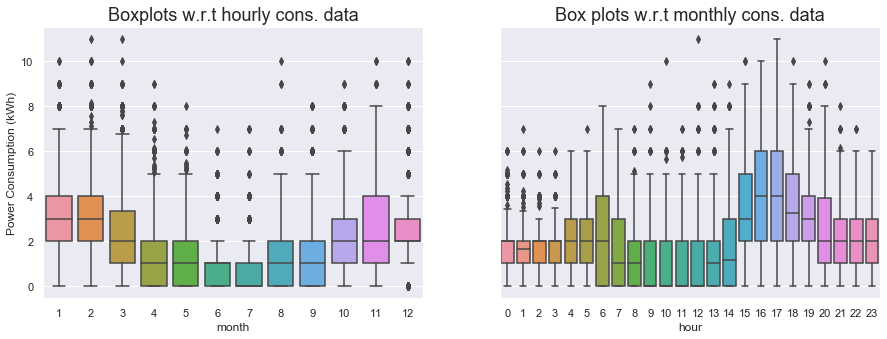

In [18]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15,5)
fig, axes = plt.subplots(1,2, sharey = True)

#create chart in each subplot
sns.boxplot(x='month', y='num_kwh', data=df_mm_cons, ax=axes[0])
sns.boxplot(x='hour', y='num_kwh', data=df_mm_cons, ax=axes[1])
axes[0].set_title('Boxplots w.r.t hourly cons. data', fontsize=18)
axes[1].set_title('Box plots w.r.t monthly cons. data', fontsize=18)
axes[0].set_ylabel('Power Consumption (kWh)', size=12) 
axes[1].set_ylabel('', size=12) 

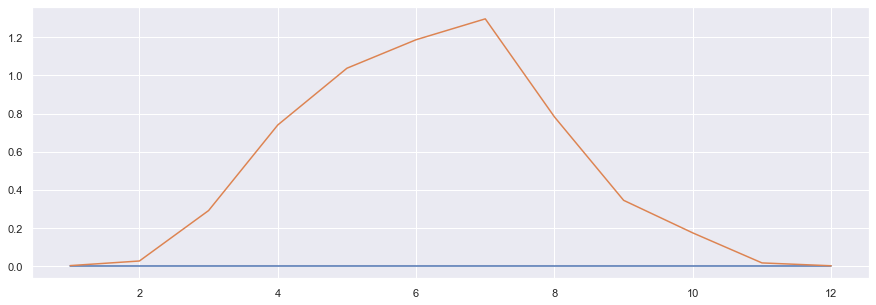

In [19]:
plt.plot(df_mm_prod.groupby('month')['num_kwh'].median(), label='Median')
plt.plot(df_mm_prod.groupby('month')['num_kwh'].mean(), label='Mean')
